In [11]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Import Files

File_1 = "city_data.csv"
Data1_df = pd.read_csv(File_1)

File_2 = "ride_data.csv"
Data2_df = pd.read_csv(File_2)

#Merge Data Frames

Merge_Table = pd.merge(Data1_df, Data2_df, on='city')

Merge_Table.head()

#Create Variables

city = Merge_Table['city']
driver_count = Merge_Table['driver_count']
Type = Merge_Table['type']
date = Merge_Table['date']
fare = Merge_Table['fare']
ID = Merge_Table['ride_id']

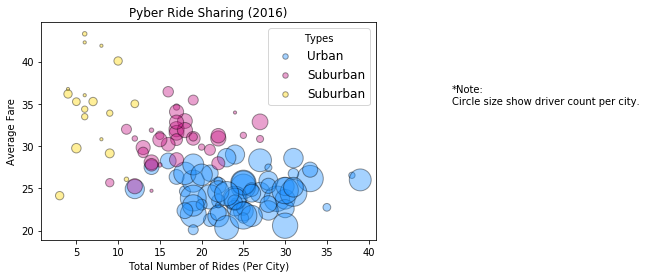

In [12]:
# Obtain the x and y coordinates for each of the three city types

# Urban City Information
Urban_1 = Merge_Table["type"] == "Urban"
Urban_2 = Merge_Table[Urban_1]
Urban_cities=Urban_2.groupby(["city"])
Urban_R_C = Urban_cities.count()['ride_id']
Urban_D_C = Urban_cities.mean()['driver_count']
Urban_N_D = Urban_cities.mean()['fare']
 
# Suburban City Information
Suburban_1 = Merge_Table["type"] == "Suburban"
Suburban_2 = Merge_Table[Suburban_1]
Suburban_cities=Suburban_2.groupby(["city"])
Suburban_R_C = Suburban_cities.count()['ride_id']
Suburban_D_C = Suburban_cities.mean()['driver_count']
Suburban_N_D = Suburban_cities.mean()['fare']

#Rural City Information
Rural_1 = Merge_Table["type"] == "Rural"
Rural_2 = Merge_Table[Rural_1]
Rural_cities=Rural_2.groupby(["city"])
Rural_R_C = Rural_cities.count()['ride_id']
Rural_D_C = Rural_cities.mean()['driver_count']
Rural_N_D = Rural_cities.mean()['fare']

# Build the scatter plots for each city types

dotSize=10
alphaC=.40
dotSizeL=30

# Incorporate the other graph properties
#Urban
plt.scatter(Urban_R_C, 
            Urban_N_D, 
            s=dotSize*Urban_D_C, c="DodgerBlue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Urban")

#Suburban
plt.scatter(Suburban_R_C, 
            Suburban_N_D, 
            s=dotSize*Suburban_D_C, c="MediumVioletRed", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Suburban")

#Rural
plt.scatter(Rural_R_C, 
            Rural_N_D, 
            s=dotSize*Rural_D_C, c="Gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Suburban")

# Create a legend

plt.title("Pyber Ride Sharing (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare")
Legend_1 = plt.legend(fontsize="large", 
                  loc="best", title="Types", 
                  labelspacing=0.5)

# Incorporate a text label regarding circle size
Legend_1.legendHandles[0]._sizes = [dotSizeL]
Legend_1.legendHandles[1]._sizes = [dotSizeL]
Legend_1.legendHandles[2]._sizes = [dotSizeL]

plt.text(50, 35, "*Note:\nCircle size show driver count per city.")

# Save Figure
plt.show()
plt.savefig('scatter.png')

          Total Fare
type                
Rural        4327.93
Suburban    19356.33
Urban       39854.38


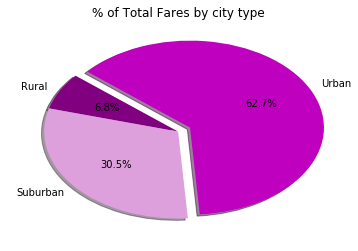

In [13]:
# Percentage of total fares by city type

#Group Data by type and count
Pie_Fares = Merge_Table.groupby(["type"]).sum()["fare"].rename("Total Purchase Value")

df = pd.DataFrame({'Total Fare' : Pie_Fares})

print(df)

#Isolate count by city
x = df['Total Fare']

# Label chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["Purple", "plum", "m"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#Set title
plt.title('% of Total Fares by city type')

#Create Pie Chart
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig('pie_1.png')

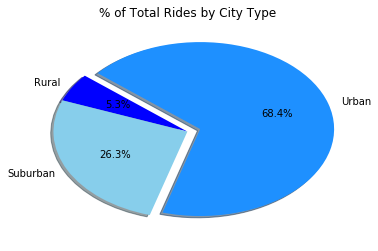

In [14]:

# Percentage of total rides by city Type

#Group Data by type and count
Pie_1 = Merge_Table.groupby('type').count()

#Isolate count by city
x = Pie_1['city']

# Label chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["Blue", "SkyBlue", "DodgerBlue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#Set title
plt.title('% of Total Rides by City Type')

#Create Pie Chart
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig('pie_2.png')

          Total Drivers
type                   
Rural               537
Suburban           8570
Urban             59602


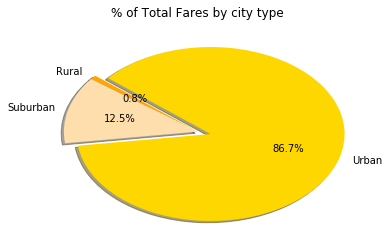

In [15]:
# Percentage of total Drivers by city type

#Group Data by type and count
Driver_Count = Merge_Table.groupby(["type"]).sum()["driver_count"].rename("Total Purchase Value")

df_2 = pd.DataFrame({'Total Drivers' : Driver_Count})

print(df_2)

#Isolate count by city
x = df_2['Total Drivers']

# Label chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["orange", "navajowhite", "gold"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#Set title
plt.title('% of Total Fares by city type')

#Create Pie Chart
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig('pie_3.png')